In [1]:
print("hello world")

hello world


# New section

In [ ]:
import pandas as pd

In [3]:
df = pd.read_csv("/used_cars.csv")

In [4]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
#removing duplicates
df_cleaned = df.drop_duplicates(inplace=True)

In [6]:
#after removing duplicates
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [7]:
#checking for NULL cols
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [10]:
df.iloc[0, 0] = None #indexing location
df.isnull().sum() #Number of Missing values in each column sum() is w.r.t 0's and 1's

,0
brand,1
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [11]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/used_cars.csv')

# First look at the dataset
print(df.head())
print(df.info())
print(df.describe())

# Checking for null values
print(df.isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)

# EDA: Visualizations
plt.figure(figsize=(10,5))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')

plt.figure(figsize=(10,5))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Price vs Fuel Type')
plt.show()

# Feature Engineering
df['car_age'] = 2025 - df['year']  # Assuming year column exists

# Drop columns that won't help or leak data
df.drop(['name', 'year'], axis=1, inplace=True)

# Encode categorical variables
categorical = ['fuel', 'seller_type', 'transmission', 'owner']
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])

# Feature-target split
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Model - Linear Regression (you can try RandomForest or XGBoost too)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Sample Prediction
print("Sample Prediction:", model.predict([X_test.iloc[0]]))

      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic        

KeyError: 'selling_price'

<Figure size 1000x500 with 0 Axes>

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('/mnt/data/used_cars.csv')

# Display basic info
print("Shape:", df.shape)
print(df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Basic statistics
print("\nSummary statistics:\n", df.describe(include='all'))

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Clean column names if needed
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# --- EDA ---

# Target variable distribution (assuming 'price' is the target)
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=40, kde=True)
plt.title('Distribution of Car Prices')
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Categorical feature visualization (e.g., fuel type)
if 'fuel_type' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='fuel_type', order=df['fuel_type'].value_counts().index)
    plt.title('Fuel Type Distribution')
    plt.xticks(rotation=45)
    plt.show()

# --- Feature Engineering ---

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Create new features if applicable
if 'year' in df.columns:
    df['car_age'] = 2025 - df['year']
    df.drop('year', axis=1, inplace=True)

# Handle outliers in 'price' (optional, depends on analysis)
q_low = df["price"].quantile(0.01)
q_high = df["price"].quantile(0.99)
df = df[(df["price"] >= q_low) & (df["price"] <= q_high)]

# Fill or drop missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Final look
print("\nFinal dataset shape:", df.shape)
print(df.head())

# Save cleaned data
df.to_csv('/mnt/data/used_cars_cleaned.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/used_cars.csv'

<ipython-input-15-55c3750782e8>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna('Unknown', inplace=True)
<ipython-input-15-55c3750782e8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

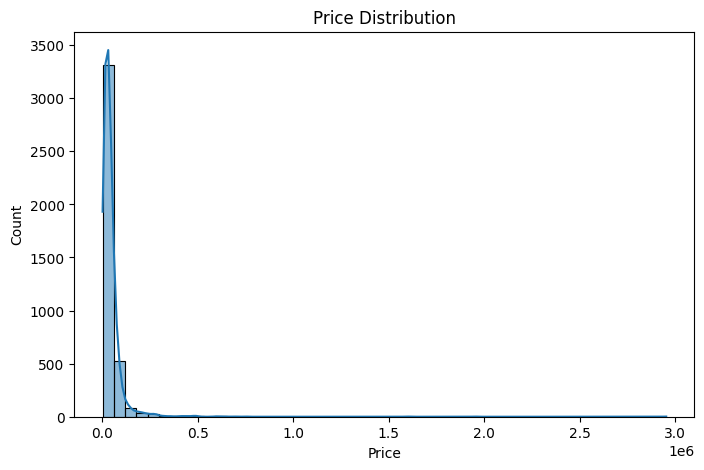

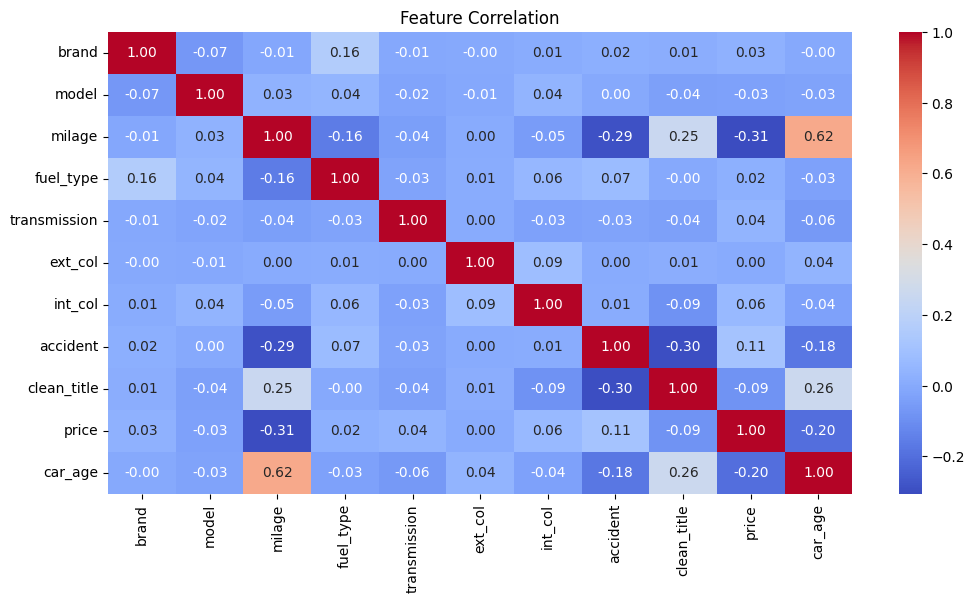

Final dataset shape: (4009, 12)
   brand  model   milage  fuel_type  \
0     14   1743  51000.0          1   
1     19   1182  34742.0          2   
2     27   1325  22372.0          2   
3     20   1242  88900.0          3   
4      3   1225   9835.0          2   

                                              engine  transmission  ext_col  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...            16       29   
1                               3.8L V6 24V GDI DOHC            32      185   
2                                     3.5 Liter DOHC            40       38   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...            23       29   
4                         2.0L I4 16V GDI DOHC Turbo            32      120   

   int_col  accident  clean_title    price  car_age  
0       14         0            1  10300.0       12  
1       71         0            1  38005.0        4  
2       14         1            0  54598.0        3  
3       14         1            1  15500.0

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/used_cars.csv')

# 1. Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# 2. Convert 'price' and 'milage' to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['milage'] = df['milage'].replace('[\, mi.]', '', regex=True).astype(float)

# 3. Drop rows with missing target
df = df[df['price'].notnull()]

# 4. Fill missing values
df['fuel_type'].fillna('Unknown', inplace=True)
df['accident'].fillna('Unknown', inplace=True)
df['clean_title'].fillna('Unknown', inplace=True)

# 5. Feature Engineering
df['car_age'] = 2025 - df['model_year']
df.drop('model_year', axis=1, inplace=True)

# 6. Encode categorical columns using Label Encoding
from sklearn.preprocessing import LabelEncoder
cat_cols = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 7. EDA - Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

# 8. Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

# 9. Save the cleaned data
df.to_csv('/used_cars.csv', index=False)

# Final preview
print("Final dataset shape:", df.shape)
print(df.head())


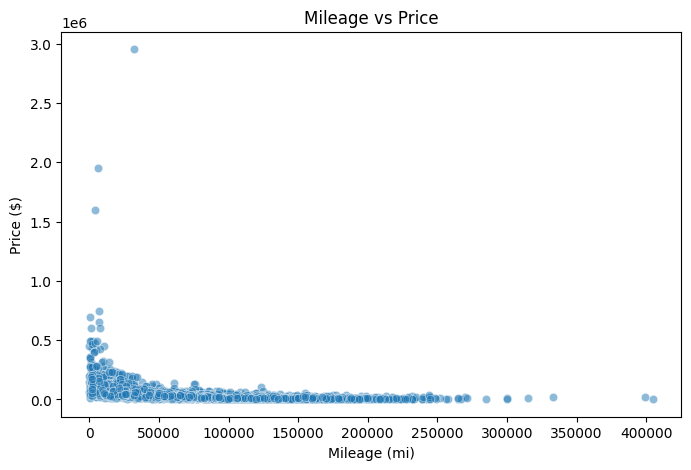

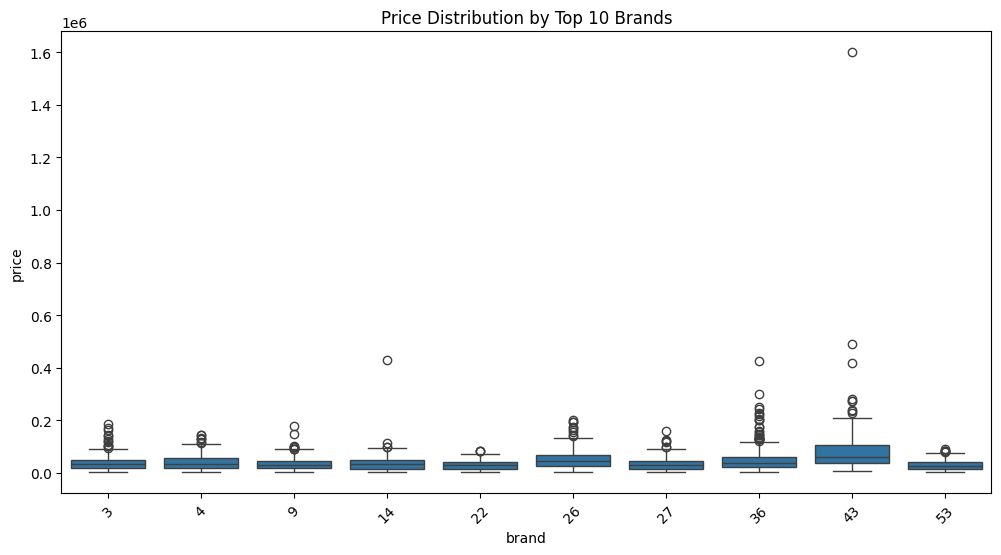

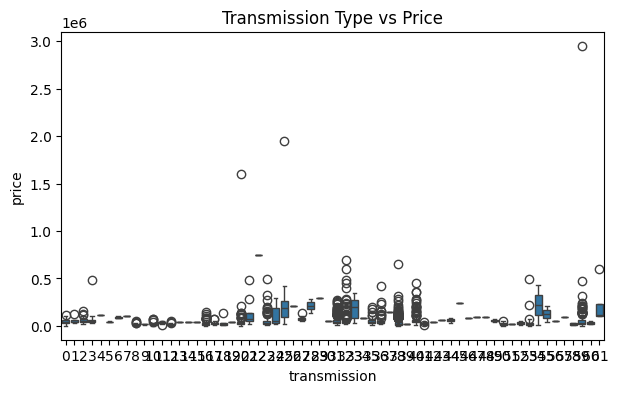

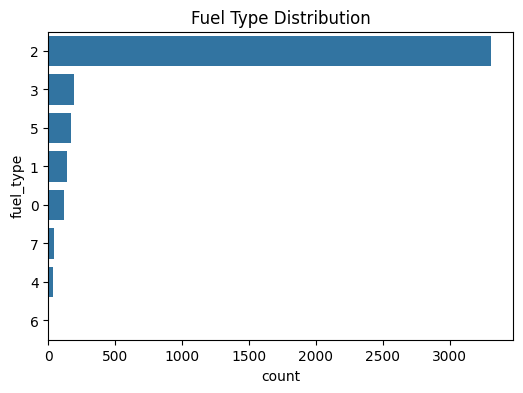

<ipython-input-16-cd2ed596e0cd>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log1p(df['price'])  # log(1 + x)
<ipython-input-16-cd2ed596e0cd>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_milage'] = np.log1p(df['milage'])
<ipython-input-16-cd2ed596e0cd>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan


Average Price per Brand:
 brand
45    93138.176471
30    92950.000000
46    74650.000000
33    64250.000000
5     59660.615385
29    54812.500000
23    53250.000000
2     51168.000000
43    50277.326531
52    48439.471264
Name: price, dtype: float64


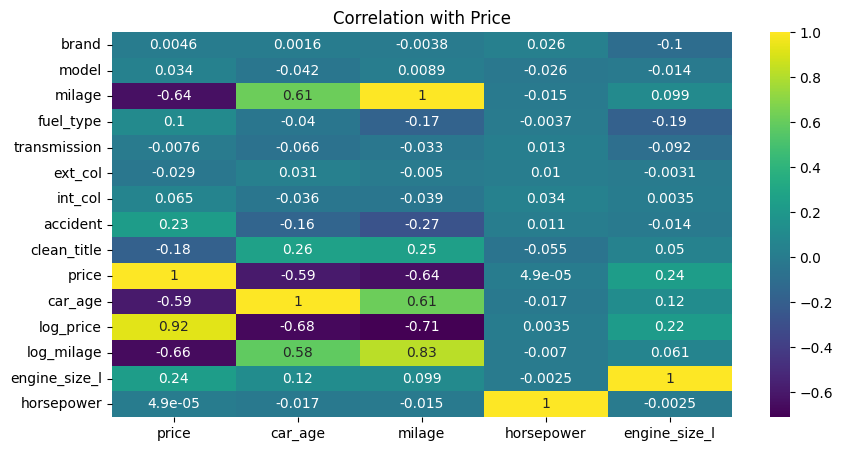

In [16]:
# --- Extended EDA ---

# 1. Price vs Mileage scatter
plt.figure(figsize=(8, 5))
sns.scatterplot(x='milage', y='price', data=df, alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage (mi)')
plt.ylabel('Price ($)')
plt.show()

# 2. Price by Brand (Top 10)
top_brands = df['brand'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=df[df['brand'].isin(top_brands)])
plt.title('Price Distribution by Top 10 Brands')
plt.xticks(rotation=45)
plt.show()

# 3. Price by Transmission
plt.figure(figsize=(7, 4))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Transmission Type vs Price')
plt.show()

# 4. Count of Fuel Types
plt.figure(figsize=(6, 4))
sns.countplot(y='fuel_type', data=df, order=df['fuel_type'].value_counts().index)
plt.title('Fuel Type Distribution')
plt.show()

# 5. Outlier Removal (Optional – fine-tune for modeling)
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['price'] >= lower) & (df['price'] <= upper)]

# 6. Log Transformation (Optional)
df['log_price'] = np.log1p(df['price'])  # log(1 + x)
df['log_milage'] = np.log1p(df['milage'])

# 7. Grouped Aggregates (example: average price per brand)
brand_avg_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)
print("\nAverage Price per Brand:\n", brand_avg_price.head(10))

# 8. Feature: Engine size (extract numeric from text if consistent)
import re
def extract_engine_size(text):
    match = re.search(r'(\d\.\d)[L|l]', str(text))
    return float(match.group(1)) if match else np.nan

df['engine_size_l'] = df['engine'].apply(extract_engine_size)
df['engine_size_l'].fillna(df['engine_size_l'].median(), inplace=True)

# 9. Feature: Horsepower (if mentioned like "300HP")
def extract_hp(text):
    match = re.search(r'(\d+)\s*HP', str(text).upper())
    return int(match.group(1)) if match else np.nan

df['horsepower'] = df['engine'].apply(extract_hp)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Drop original engine column if needed
df.drop('engine', axis=1, inplace=True)

# 10. Check correlation with new features
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True)[['price', 'car_age', 'milage', 'horsepower', 'engine_size_l']], annot=True, cmap='viridis')
plt.title('Correlation with Price')
plt.show()


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3765 entries, 0 to 4008
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          3765 non-null   int64  
 1   model          3765 non-null   int64  
 2   milage         3765 non-null   float64
 3   fuel_type      3765 non-null   int64  
 4   transmission   3765 non-null   int64  
 5   ext_col        3765 non-null   int64  
 6   int_col        3765 non-null   int64  
 7   accident       3765 non-null   int64  
 8   clean_title    3765 non-null   int64  
 9   price          3765 non-null   float64
 10  car_age        3765 non-null   int64  
 11  log_price      3765 non-null   float64
 12  log_milage     3765 non-null   float64
 13  engine_size_l  3765 non-null   float64
 14  horsepower     3765 non-null   float64
dtypes: float64(6), int64(9)
memory usage: 470.6 KB
